In [523]:
%reset -f


# asymmetric loss function & prediction bands

In [524]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

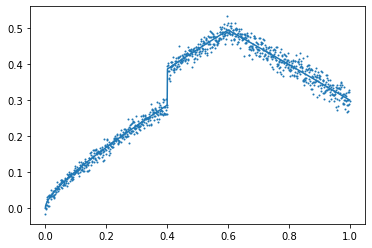

In [525]:
N=1000
x=np.arange(N)/N
y=0.6+0.4*x+0.2*np.sqrt(x)+0.1*np.heaviside(x-0.4,0)-np.maximum(x,0.6)

x1=x


noise=np.random.normal(0,0.01,N)
y1=y+noise*(1+x)

plt.plot(x,y)
plt.scatter(x,y1,s=1)

In [526]:
def func1(b,x,N_node):
    y= b[0]+b[1]*x+b[2]*x*x+b[3]*np.sqrt(x)+b[4]*np.abs(x-0.5)
    y=b[0]*np.ones(len(x))
    for i in range(N_node):
        j=i*3+1
        y+=b[j]*np.tanh(b[j+1]+b[j+2]*x)
    return y

def f_mse1(b,x,y,N_node,a):
    yhat=func1(b,x,N_node)
    err=yhat-y
    return (1-a)*np.sum(np.square(err[err>0]))+a*np.sum(np.square(err[err<0]))

f_mse_train = lambda b : f_mse1(b,x_train,y_train,N_node,a)

In [527]:
N_node=5
Nv=3*N_node+1
b=np.random.rand(Nv)
a=0.5


In [528]:
indices = np.random.permutation(x.shape[0])
N_train=int(0.7*N)
N_test=N-N_train
index_train,index_test = indices[:N_train], indices[N_train:]

index_train,index_test=np.sort(index_train),np.sort(index_test)


In [529]:
x_train=x1[index_train]
y_train=y1[index_train]
x_test=x1[index_test]
y_test=y1[index_test]

In [530]:
f_mse1(b,x,y,N_node,a)

3392.6038571114796

In [531]:
f_mse1(b,x_train,y_train,N_node,a),f_mse1(b,x_test,y_test,N_node,a),f_mse1(b,x,y,N_node,a)

(2371.488706068818, 1022.8942707027388, 3392.6038571114796)

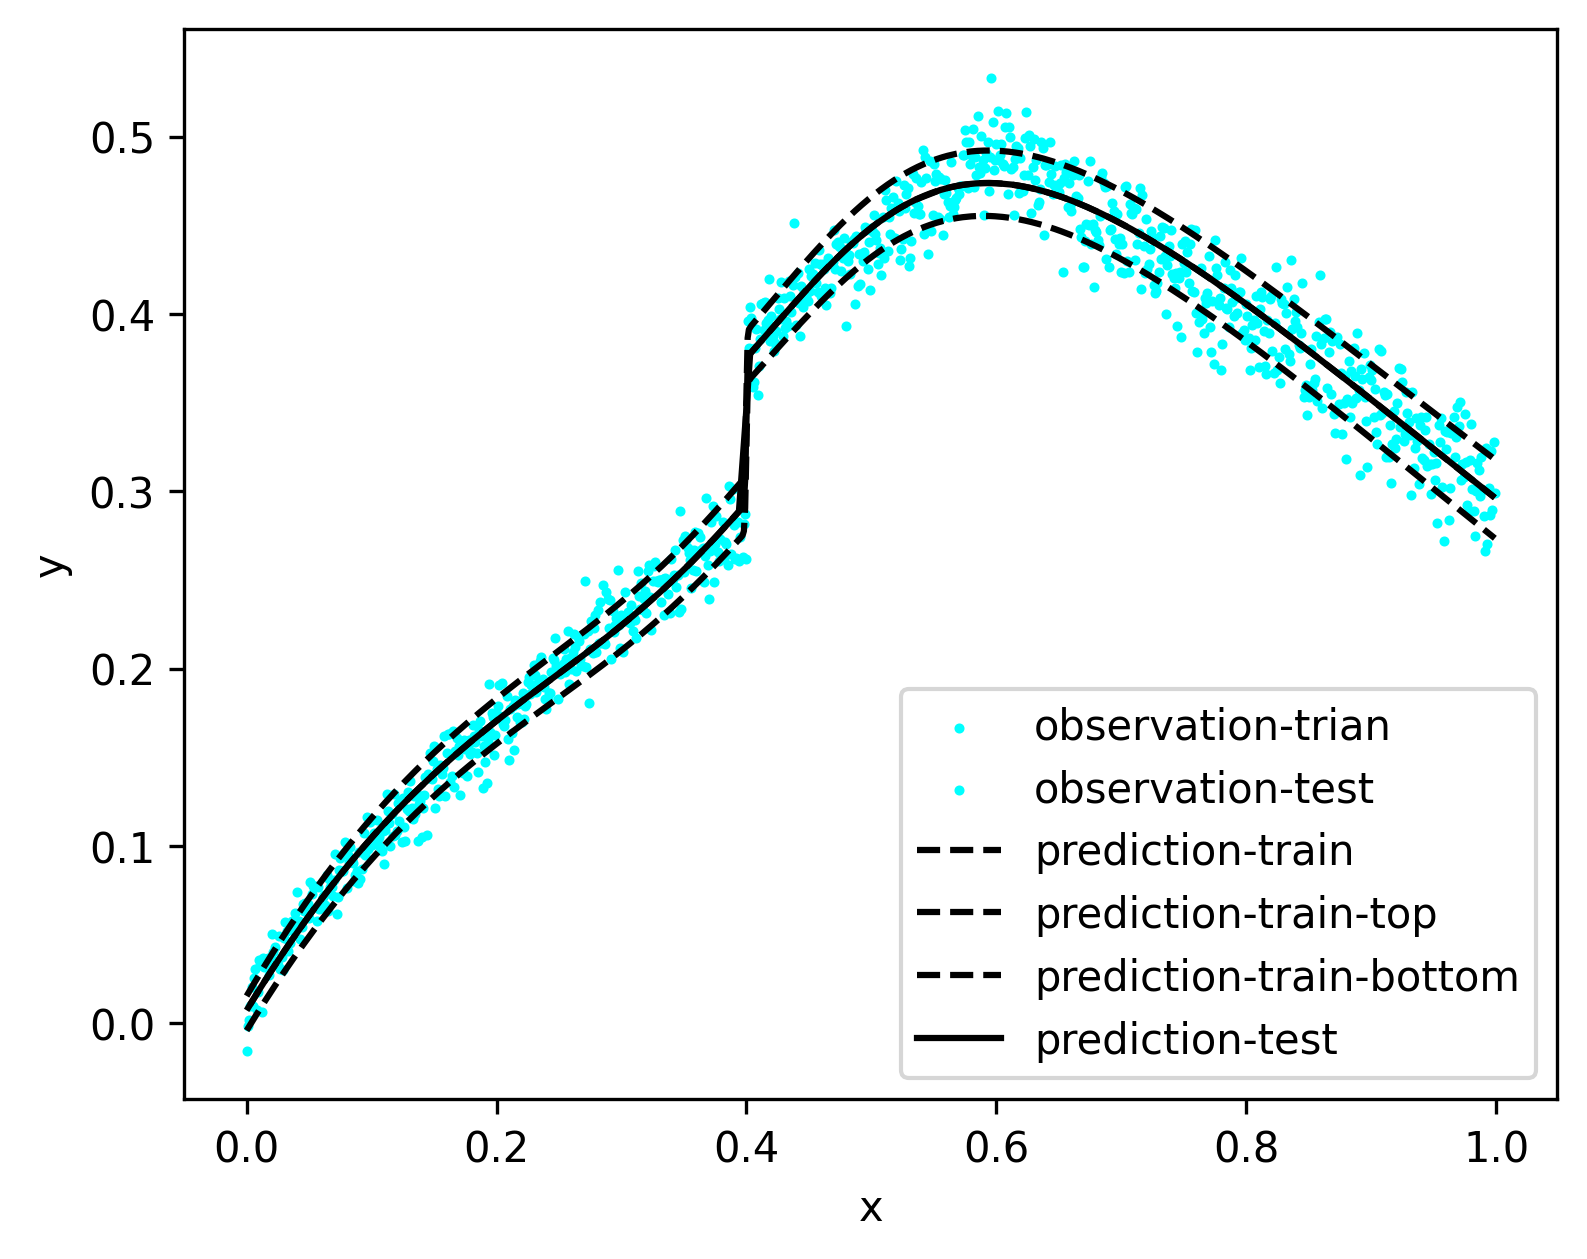

In [532]:
a_top=0.935

a=0.5
b=np.random.rand(Nv)
bmid=minimize(f_mse_train,b).x


a=a_top
btop=minimize(f_mse_train,bmid).x

a=1-a_top
bbot=minimize(f_mse_train,bmid).x

yhat_train=func1(bmid,x_train,N_node)
yhat_test=func1(bmid,x_test,N_node)

yhat_train_top=func1(btop,x_train,N_node)
yhat_train_bot=func1(bbot,x_train,N_node)

plt.figure(figsize=(15/2.54, 12/2.54), dpi=300)
plt.scatter(x_train,y_train,s=2,color='cyan',label='observation-trian')
plt.scatter(x_test,y_test,s=2,color='cyan',label='observation-test')
plt.plot(x_train,yhat_train,'k--',label='prediction-train')
plt.plot(x_train,yhat_train_top,'k--',label='prediction-train-top')
plt.plot(x_train,yhat_train_bot,'k--',label='prediction-train-bottom')
plt.plot(x_test,yhat_test,'k',label='prediction-test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [533]:
std2=np.mean(0.5*(yhat_train_top-yhat_train_bot))

In [534]:
std1=np.std(yhat_train-y_train)

std1,std2

(0.016198257330125004, 0.01642203212552911)

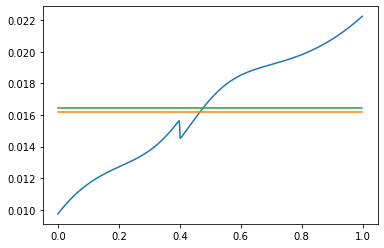

In [535]:
plt.plot(x_train,0.5*(yhat_train_top-yhat_train_bot))
plt.plot(x_train,np.ones(N_train)*std1)
plt.plot(x_train,np.ones(N_train)*std2)